In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np

from jaxlayerlumos import stackrt
from jaxlayerlumos.utils_materials import get_n_k_surrounded_by_air
from jaxlayerlumos.utils_spectra import get_frequencies_visible_light, convert_frequencies_to_wavelengths
from jaxlayerlumos.utils_layers import get_thicknesses_surrounded_by_air
from jaxlayerlumos.utils_units import convert_nm_to_m



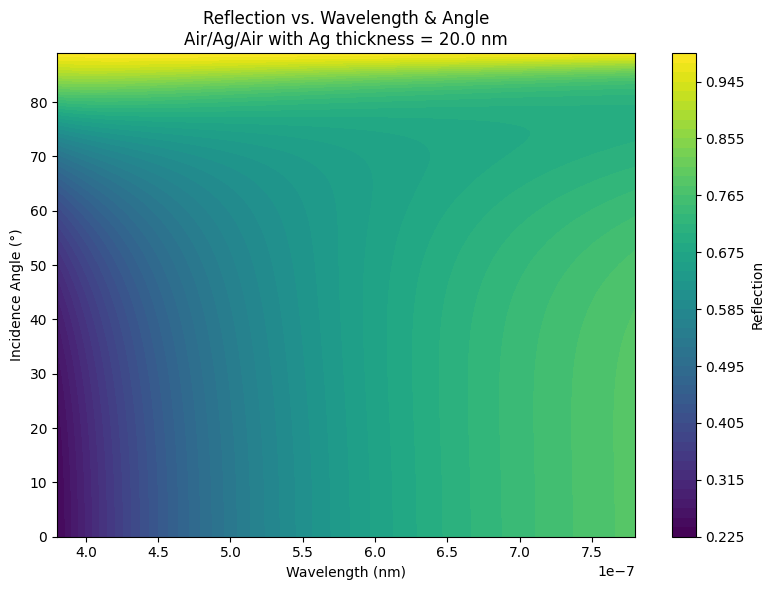

In [3]:
fixed_ag_thickness = 20.0  # Ag layer thickness in nm

# --- Frequency grid for visible light ---
frequencies = get_frequencies_visible_light()  # Frequencies in Hz
wavelengths = convert_frequencies_to_wavelengths(frequencies)  # Wavelengths in nm

# --- Material and stack setup ---
# Define a single Ag layer; the helper automatically pads with "Air" on both sides.
materials = ["Ag"]
n_k = get_n_k_surrounded_by_air(materials, frequencies)

# Obtain the thickness array for the Ag layer and convert thicknesses from nm to m.
d_stack = get_thicknesses_surrounded_by_air(jnp.array([fixed_ag_thickness]))
d_stack_m = convert_nm_to_m(d_stack)

# --- Angle sweep ---
# Create an array of incidence angles (in degrees) from 0° to 89°.
angles = jnp.linspace(0, 89, 100)  # 100 angle points

# --- Compute reflection ---
# Compute the TE and TM reflection coefficients for each combination of frequency and angle.
R_TE, T_TE, R_TM, T_TM = stackrt(n_k, d_stack_m, frequencies, angles)

# Average the TE and TM reflection values.
R_avg = (R_TE + R_TM) / 2.0
# Note: We keep the original reflection values (unitless), not converting to dB.
R_np = np.array(R_avg)

# --- Create a contour plot ---
# For plotting:
#   x-axis: wavelength (nm) — one value per frequency point.
#   y-axis: incidence angle (°).
#   z-axis: reflection (unitless).
wavelengths_np = np.array(wavelengths)
angles_np = np.array(angles)
X, Y = np.meshgrid(wavelengths_np, angles_np)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, R_np, levels=50, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label("Reflection")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Incidence Angle (°)")
plt.title(f"Reflection vs. Wavelength & Angle\nAir/Ag/Air with Ag thickness = {fixed_ag_thickness} nm")
plt.tight_layout()
plt.show()
